In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [10]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [13]:
today_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

print(today_date)

('2017-08-23',)


In [14]:
today_date = list(np.ravel(today_date))[0]
today_date = dt.datetime.strptime(today_date, '%Y-%m-%d')

print(today_date)

2017-08-23 00:00:00


In [15]:
last_year = today_date - dt.timedelta(days=365)
print(last_year)

2016-08-23 00:00:00


In [16]:
shower = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > last_year).\
    order_by(Measurement.date).all()

shower

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [17]:
rain_df = pd.DataFrame(shower)
rain_df.set_index('date').head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


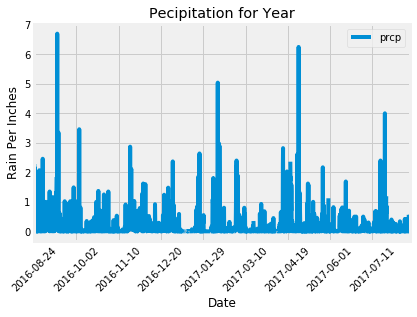

In [18]:
rain_df.plot('date', 'prcp')
plt.xlabel("Date")
plt.ylabel("Rain Per Inches")
plt.title("Pecipitation for Year")
plt.xticks(rotation=45)
plt.show()

![precipitation](Images/precipitation.png)

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data

rain_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [20]:
# Design a query to show how many stations are available in this dataset?
Stations = session.query(Measurement).group_by(Measurement.station).count()
print("There are {} stations.".format(Stations))

There are 9 stations.


In [21]:
Stations = session.query(Measurement).filter(Measurement.station)

print(Stations)

SELECT measurement.id AS measurement_id, measurement.station AS measurement_station, measurement.date AS measurement_date, measurement.prcp AS measurement_prcp, measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE measurement.station


In [22]:
MostActive_station = (session.query(Measurement.station, func.count(Measurement.tobs)).
                group_by(Measurement.station).\
                order_by(func.count(Measurement.tobs).desc()).all())

for station, count in MostActive_station:
    print("Stations:",station," Weather Observations: ",count)

Stations: USC00519281  Weather Observations:  2772
Stations: USC00519397  Weather Observations:  2724
Stations: USC00513117  Weather Observations:  2709
Stations: USC00519523  Weather Observations:  2669
Stations: USC00516128  Weather Observations:  2612
Stations: USC00514830  Weather Observations:  2202
Stations: USC00511918  Weather Observations:  1979
Stations: USC00517948  Weather Observations:  1372
Stations: USC00518838  Weather Observations:  511


In [13]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


[(54.0, 85.0, 71.66378066378067)]

In [23]:
# Calculate the highest temprature
stationID = MostActive_station[0][0]

highest_temp = (session.query(Measurement.tobs)
                 .filter(Measurement.station == stationID)
                 .order_by(Measurement.tobs.desc())
                 .first())[0]

print(f'Hightest Temperature: {highest_temp} ')

Hightest Temperature: 85.0 


In [24]:
# Calculate the lowest temprature
stationID = MostActive_station[0][0]

lowest_temp = (session.query(Measurement.tobs)
                 .filter(Measurement.station == stationID)
                 .order_by(Measurement.tobs.asc())
                 .first())[0]

print(f'lowest Temperature: {lowest_temp} ')

lowest Temperature: 54.0 


In [25]:
# Calculate the Average temprature
avg_temp = (session.query(func.avg(Measurement.tobs))
                   .filter(Measurement.station == stationID))

print(f'Average Temperature:', avg_temp[0][0])

Average Temperature: 71.66378066378067


In [1]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


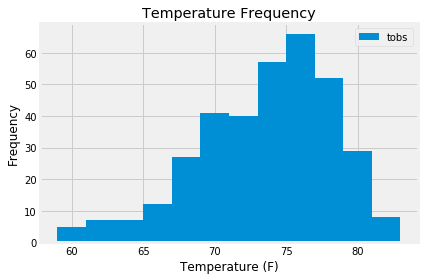

In [26]:
# Choose the station with the highest number of temperature observations.
St_High_Temp = (session.query(Measurement.date, Measurement.tobs)
                  .filter(Measurement.date > last_year)
                  .filter(Measurement.station == stationID)
                  .order_by(Measurement.date)
                  .all())




# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

df = pd.DataFrame(St_High_Temp)

temp = df.plot(kind='hist', bins=12, title=f'Temperature Frequency')
temp.set_xlabel('Temperature (F)')
temp = temp.get_figure()
plt.tight_layout()

![precipitation](Images/station-histogram.png)

In [27]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [67]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.




[(62.0, 69.57142857142857, 74.0)]

In [28]:
# this is using the previous year data for those same dates:
date_arrived = dt.date(2011, 2, 28)
date_depart = dt.date(2011, 3, 5)
last_year = dt.timedelta(days=365)


temp_avg = (calc_temps((date_arrived-last_year), (date_depart-last_year)))
print(temp_avg)

[(63.0, 68.47727272727273, 73.0)]


<IPython.core.display.Javascript object>


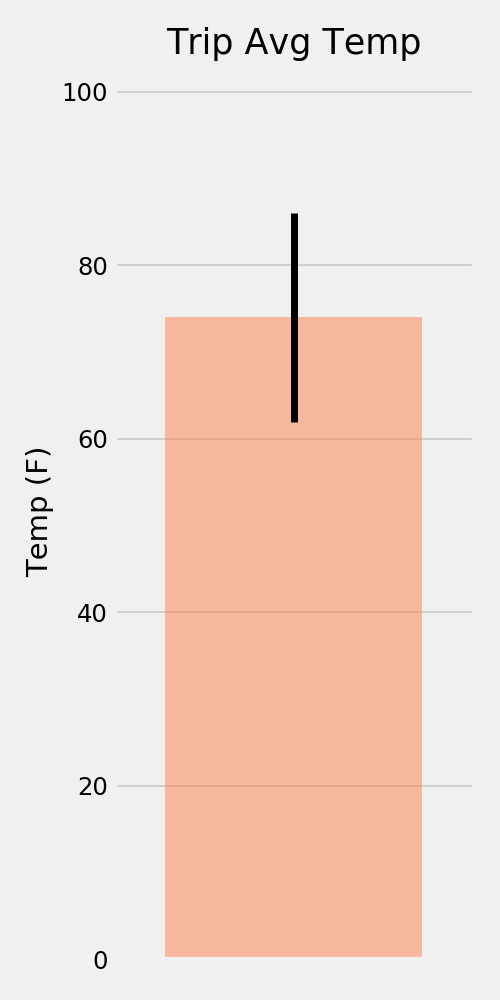

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


<Figure size 1440x720 with 0 Axes>

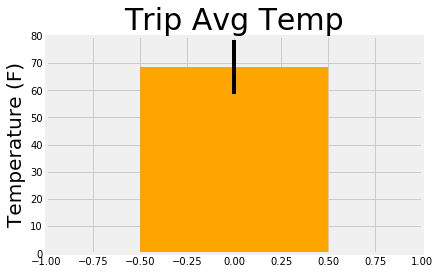

In [89]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

y_error = temp_avg[0][2] - temp_avg[0][0]


y = [temp_avg[0][1]]
x = 0

fig = plt.figure(figsize=(20,10))
fig, ax = plt.subplots()


ax.set_ylabel("Temperature (F)", fontsize=20)
ax.set_title("Trip Avg Temp", fontsize=30)


ax.bar(x, y, width=1, color="orange", yerr=y_error)
ax.set_xlim(-1, 1)
ax.set_ylim(0, 80)
ax.set_xbound(lower= -1, upper= 1)
ax.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off') 
plt.show()

In [19]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


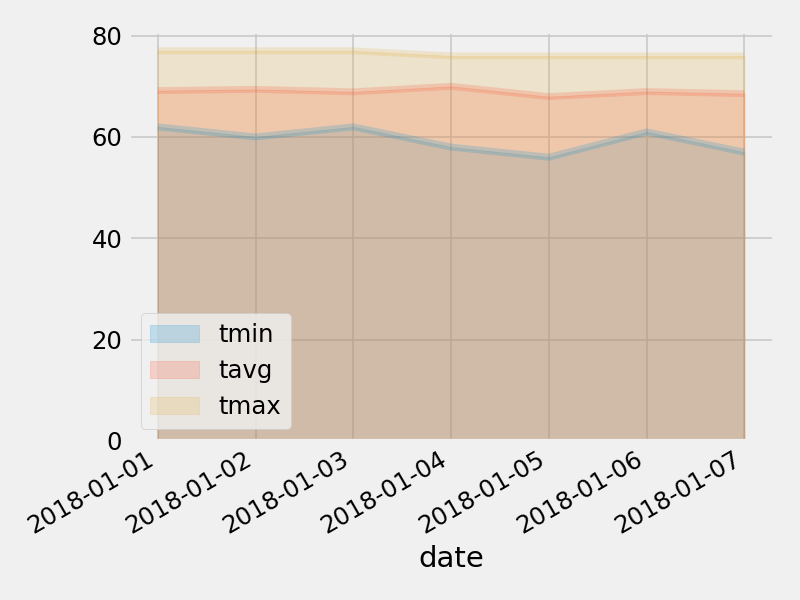

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
